In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../..')
sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

['/home/cactuskid13/pyprofiler/pyprofiler/notebooks', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python37.zip', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/lib-dynload', '', '/home/cactuskid13/.local/lib/python3.7/site-packages', '/home/cactuskid13/pyprofiler/pyprofiler/src/pyham', '/home/cactuskid13/pyprofiler/pyprofiler/src/pyprofiler/pyprofiler', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/IPython/extensions', '/home/cactuskid13/.ipython', '../..', '/home/cactuskid13/miniconda3/pkgs/']


In [2]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.profiler as profiler

{'dir': {'datadir': '/home/cactuskid13/mntpt/unil_backup/profilingbackup/', 'omadir': '/home/cactuskid13/mntpt/OMA/jun/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}
{'dir': {'datadir': '/home/cactuskid13/mntpt/unil_backup/profilingbackup/', 'omadir': '/home/cactuskid13/mntpt/OMA/jun/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}


In [3]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = config_utils.datadir+'allones256newlshforest.pkl' , hashes_h5=config_utils.datadir +'allones256hashes.h5' , mat_path= None, oma = True, tar= None , nsamples = 256)

loading lsh
indexing lsh
DONE


Cannot load SequenceSearch. Any future call to seq_search will fail!
Traceback (most recent call last):
  File "/home/cactuskid13/pyprofiler/pyprofiler/src/pyprofiler/pyprofiler/pyoma/browser/db.py", line 879, in __init__
    self.seq_idx = self.seq_idx()
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/link.py", line 397, in __call__
    self.extfile = tables.open_file(filename, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 320, in open_file
    return File(filename, mode, title, root_uep, filters, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 784, in __init__
    self._g_new(filename, mode, **params)
  File "tables/hdf5extension.pyx", line 374, in tables.hdf5extension.File._g_new
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/utils.py", line 157, in check_file_access
  

4373


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/leaf.py:414: PerformanceWarning: The Leaf ``/Protein/_i_Entries/OmaHOG/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [4]:
#lets laod OMA's GAF and make a goatools enrichment study object which we'll use to analyze the functions contrained 
#in the search results
gaf = goa.buildGAF( '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/oma-go.txt')
study = goa.return_enrichment_study_obj( gaf , obo = '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo')

/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo: fmt(1.2) rel(2019-07-01) 47,413 GO Terms

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 8,270,255 of 8,270,255 population items found in association


In [43]:
import pandas as pd
import numpy as np

#load the kinetochore data and map it to OMA HOGs
#these are blast results against oma since they had their own adhoc IDs
kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv', header = None)
#filter by evalue
kinetodf= kinetodf[kinetodf[10]< .000001]
kinetodf['name'] = kinetodf.index.map( lambda x : x.split('_')[-1] )

def grabHog(ID):
    try:
        return p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))[4]
    except:
        return np.nan
#map to OMA HOGs
kinetodf['HOG'] = kinetodf[1].map(grabHog)
print(kinetodf.head())

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


                                              1        2     3   4  5  6  \
0                                                                          
Homo_sapiens_HSAP017770_ANAPC1_Apc1  HUMAN17502  100.000  1944   0  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28459   99.743  1944   5  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  CHLSB04039   99.383  1944  12  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PAPAN05104   99.331  1944  13  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28460   99.126  1945  14  2  1   

                                        7  8     9   10      11  name  \
0                                                                       
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4029.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4017.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1   
Homo_sapiens_HSAP017770_ANAPC

In [52]:
#lets search for interactors of each HOG in our dataset and map them back to the dataframe
from pyprofiler.utils.hashutils import hogid2fam
#print(kinetodf)
print(len(kinetodf.HOG.unique()))
print(len(kinetodf.name.unique()))
Hogs = []
#lets just grab the top one closest to the human sequence with a HOG ID
for n in kinetodf.name.unique():
    sub = kinetodf[kinetodf.name == n ]
    for i in range( len(sub) ):
        if len(sub.iloc[0].HOG)>0:
            Hogs.append(sub.iloc[0].HOG)
            break

print(len(set(Hogs)))

4202
91
80


In [53]:
#now we can make a second dataframe with the hash signatures of each of our queries
#reading the hdf5 and grabbing all the hash signatures may take a moment
profiles = p.pull_hashes( set(Hogs) )
names = dict( zip( kinetodf.HOG , kinetodf.name) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  }  for h in profiles}
profiles = pd.DataFrame.from_dict( profiles , orient='index' )
print(profiles.head())
print(len(profiles))


                                                          hashsig   name
b'HOG:0217836'  <datasketch.weighted_minhash.WeightedMinHash o...   Hsk3
b'HOG:0217853'  <datasketch.weighted_minhash.WeightedMinHash o...  Spc19
b'HOG:0217889'  <datasketch.weighted_minhash.WeightedMinHash o...   Duo1
b'HOG:0217941'  <datasketch.weighted_minhash.WeightedMinHash o...  Ndc10
b'HOG:0218104'  <datasketch.weighted_minhash.WeightedMinHash o...   Cep3
80


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


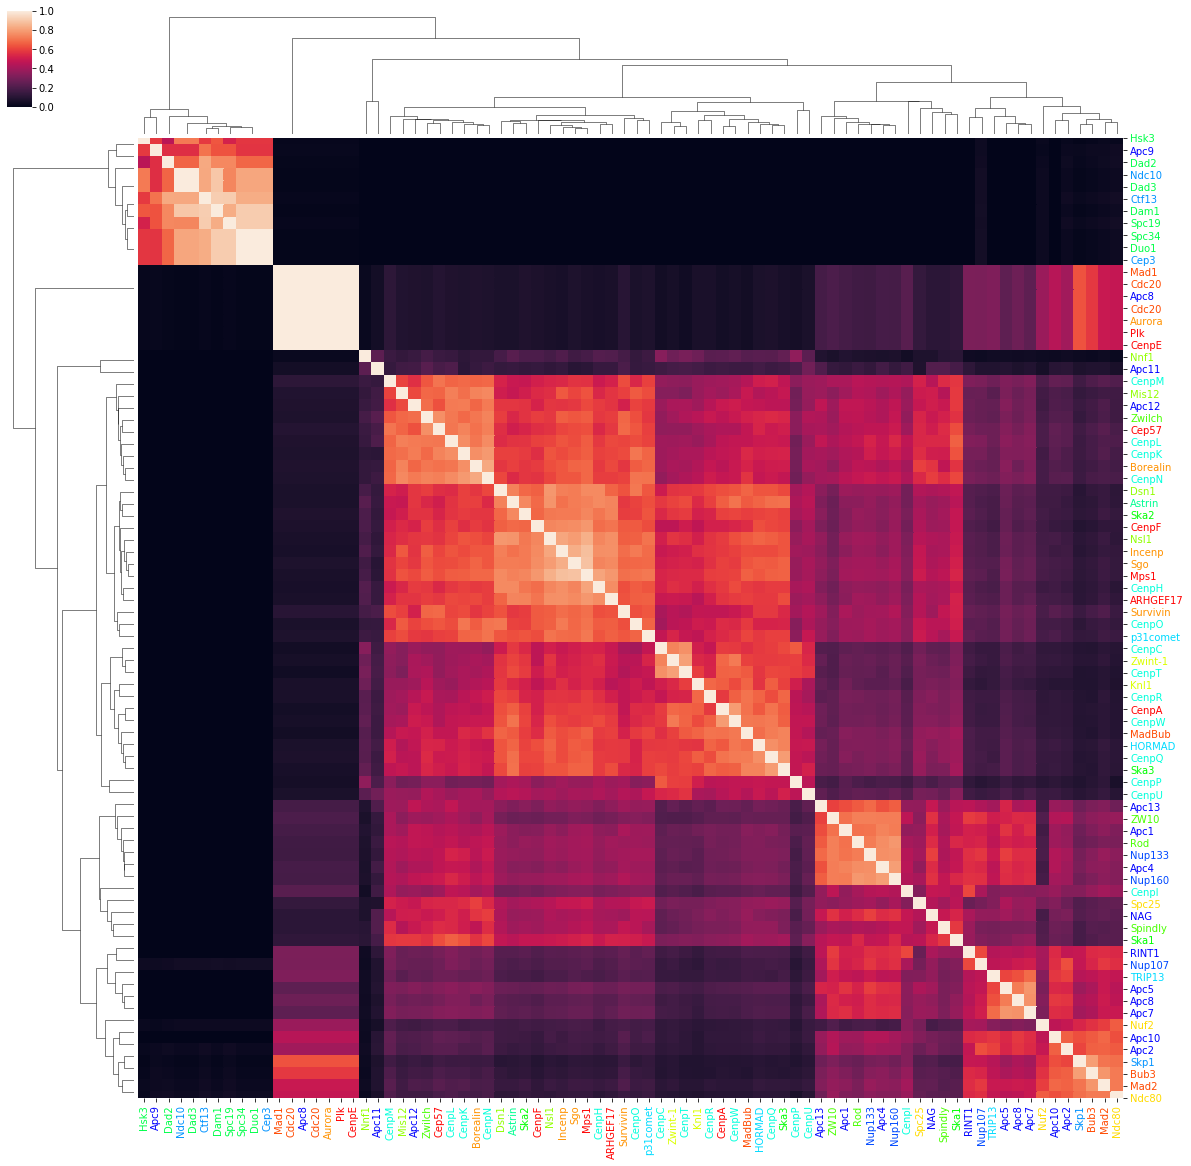

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt
import colour
#we can perform an all vs all comparison to replicate the results in va hoof et al


jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )
g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) )


colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                                
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)
   


plt.show()

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


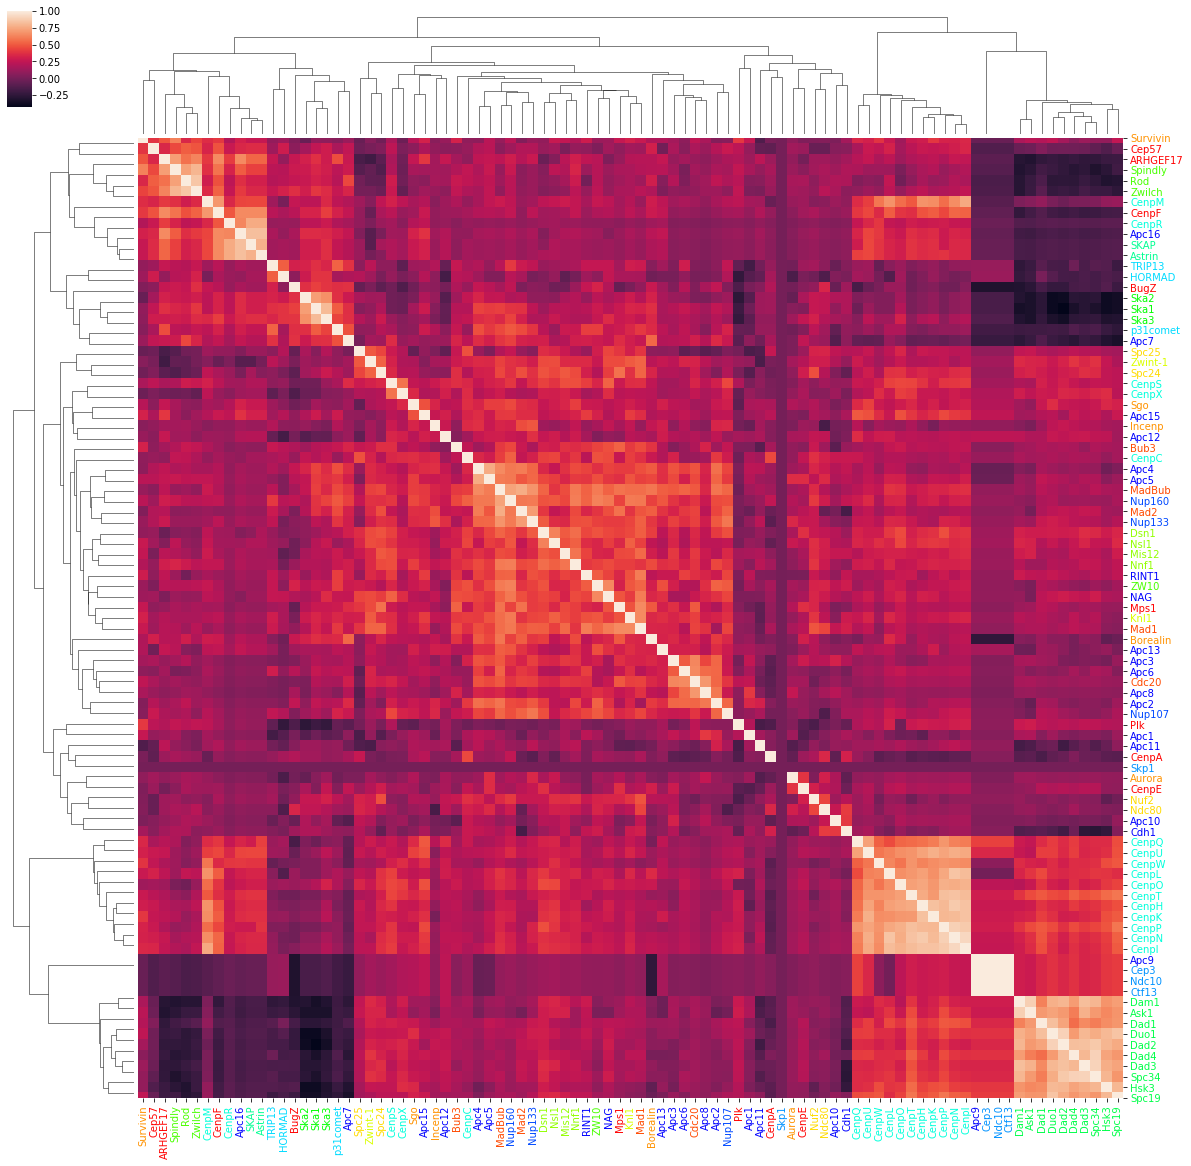

In [55]:
#lets load the original pearson correlation data and compare to our jaccar similarity metric

pearsondf = pd.DataFrame.from_csv('./kinetocore_pearson.csv')

g = sns.clustermap( pearsondf , xticklabels= pearsondf.index , yticklabels= pearsondf.index , figsize = (20,20) )

colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                                
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)
   


plt.show()


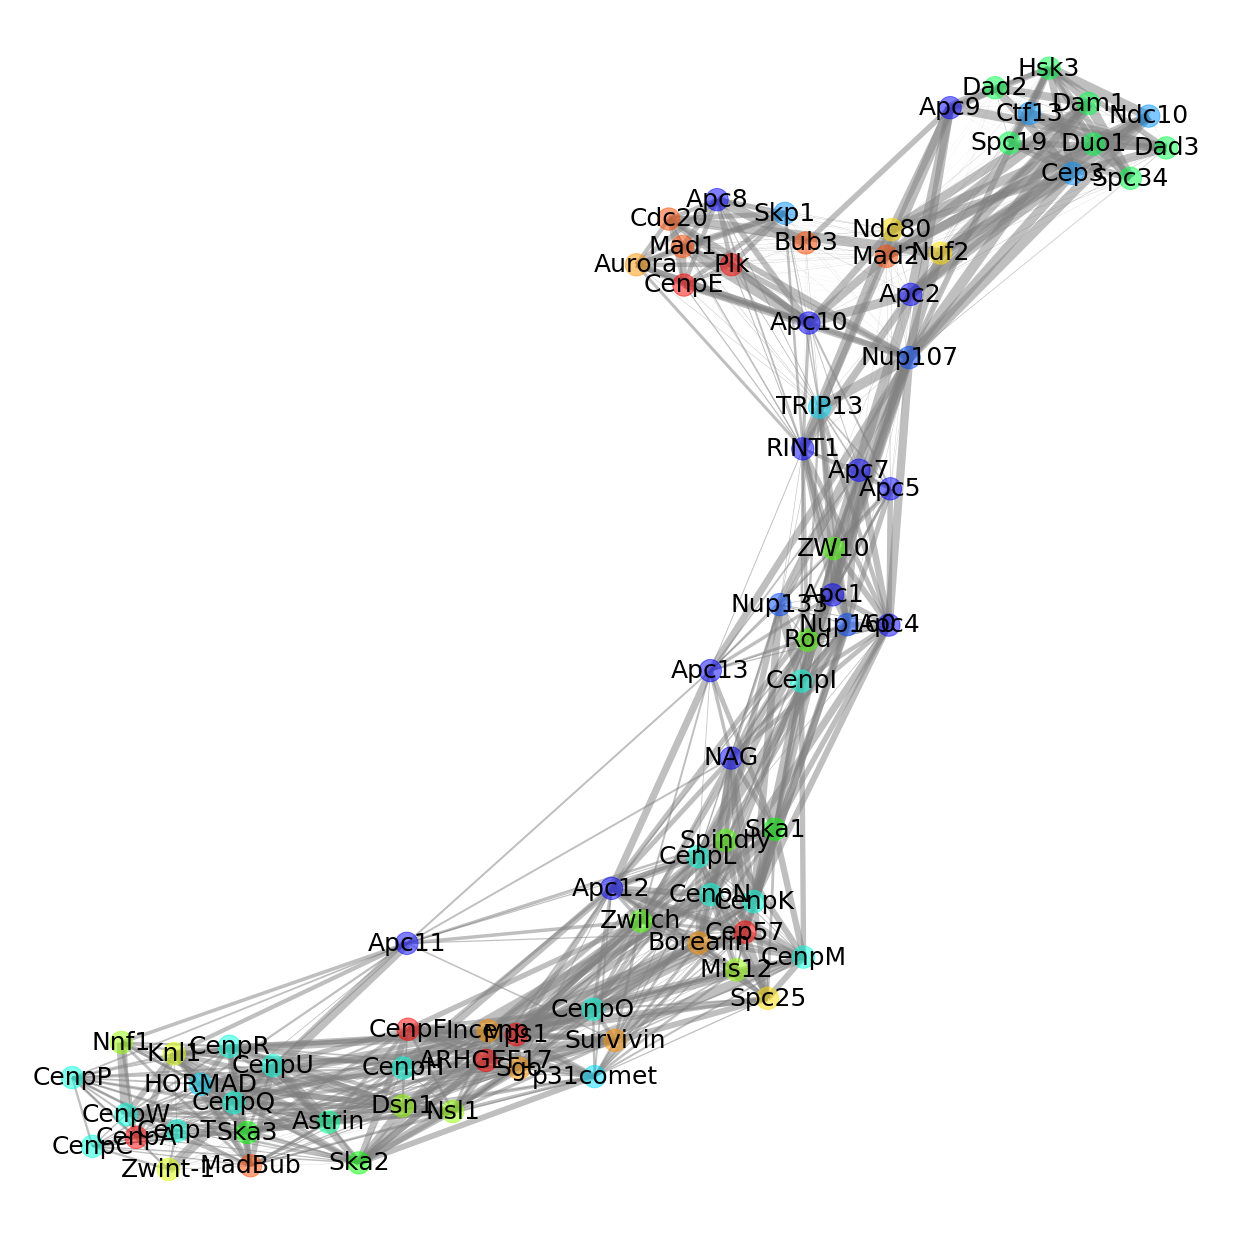

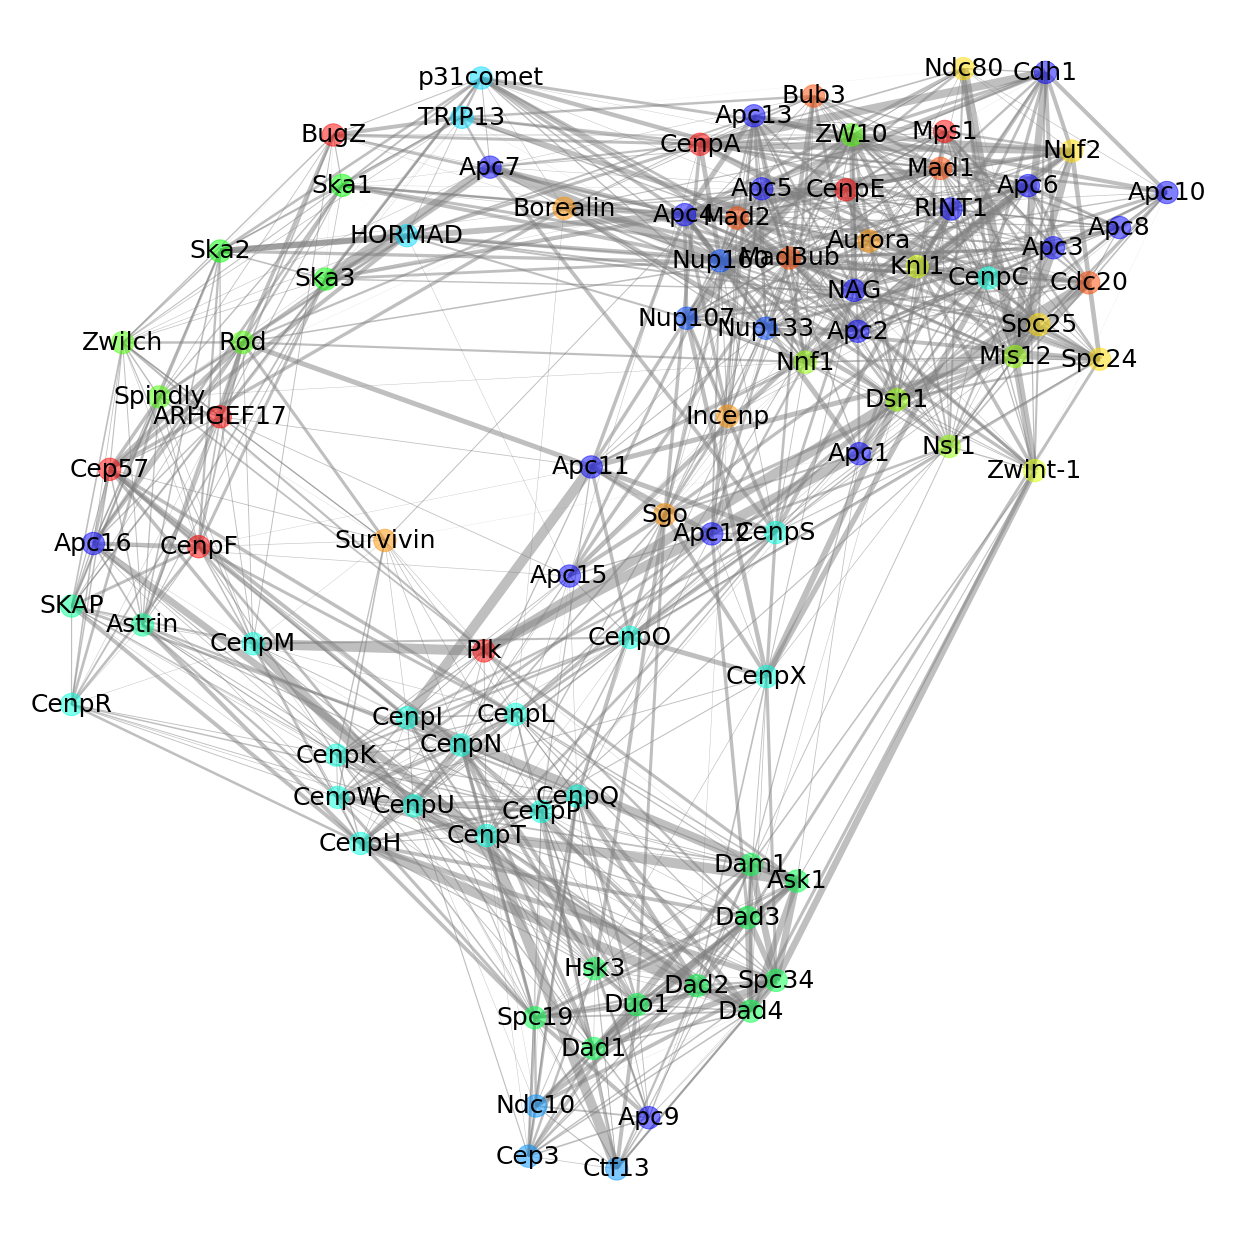

In [56]:
#lets compare the organisation of the complex in both as graph structures
import networkx as nx
pG = nx.from_numpy_matrix( pearsondf.to_numpy() )
jG = nx.from_numpy_matrix( jkern )
pG = nx.relabel_nodes( pG , { i:p for i,p in enumerate(pearsondf.index) })
jG = nx.relabel_nodes( jG , { i:p for i,p in enumerate(profiles.name) })
print(pG)
print(jG)
alledges={}
shared={}
topk = 15

for g in [jG, pG]:
    finalg = nx.Graph()
    for n in g.nodes():
        edges = [ (n,l) for l in g.neighbors(n) if n != l]
        weights = [ g[e[0]][e[1]]['weight'] for e in edges]
        keep = np.flip(np.argsort(weights))[0:topk]
        edges = [ edges[s] for s in list(keep) ]
        [ finalg.add_edge(e[0] , e[1], weight=1/ (i +1 )) for i,e in enumerate(edges) ]
    pos = nx.spring_layout( finalg , weight='weight')
    weights = np.asarray([e[2]['weight'] for e in g.edges(data = True)])
    plt.figure( figsize = (17,17))
    cvec = [ colordict[n] if n in colordict else 'black' for n in finalg.nodes()]
    nx.draw(finalg, pos=pos, edge_color='grey', width=10*weights, node_size= 500, node_color = cvec ,alpha = .5 ) 
    labels=nx.draw_networkx_labels(finalg , pos = pos , font_size= 25 )
    plt.show()


In [63]:
#now we can add in the HOGs we found in our search
#the clustering shows a similar structure

#lets query the the lsh with each HOG
res = { h: p.hog_query(hog_id= str(h), k = 10 ) for h in Hogs if len(h)>0}

profiles = p.pull_hashes( set(res.keys()).union( set( [ h for results in res.values() for h in results ] ) ) )

names = dict( zip( kinetodf.HOG , kinetodf.name) )

profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles } 

profiles = pd.DataFrame.from_dict( profiles , orient='index' )
print(profiles.head())
print(len(profiles))


                                                  hashsig name
354613  <datasketch.weighted_minhash.WeightedMinHash o...     
356793  <datasketch.weighted_minhash.WeightedMinHash o...     
360078  <datasketch.weighted_minhash.WeightedMinHash o...     
361917  <datasketch.weighted_minhash.WeightedMinHash o...     
363051  <datasketch.weighted_minhash.WeightedMinHash o...     
733


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if sys.path[0] == '':


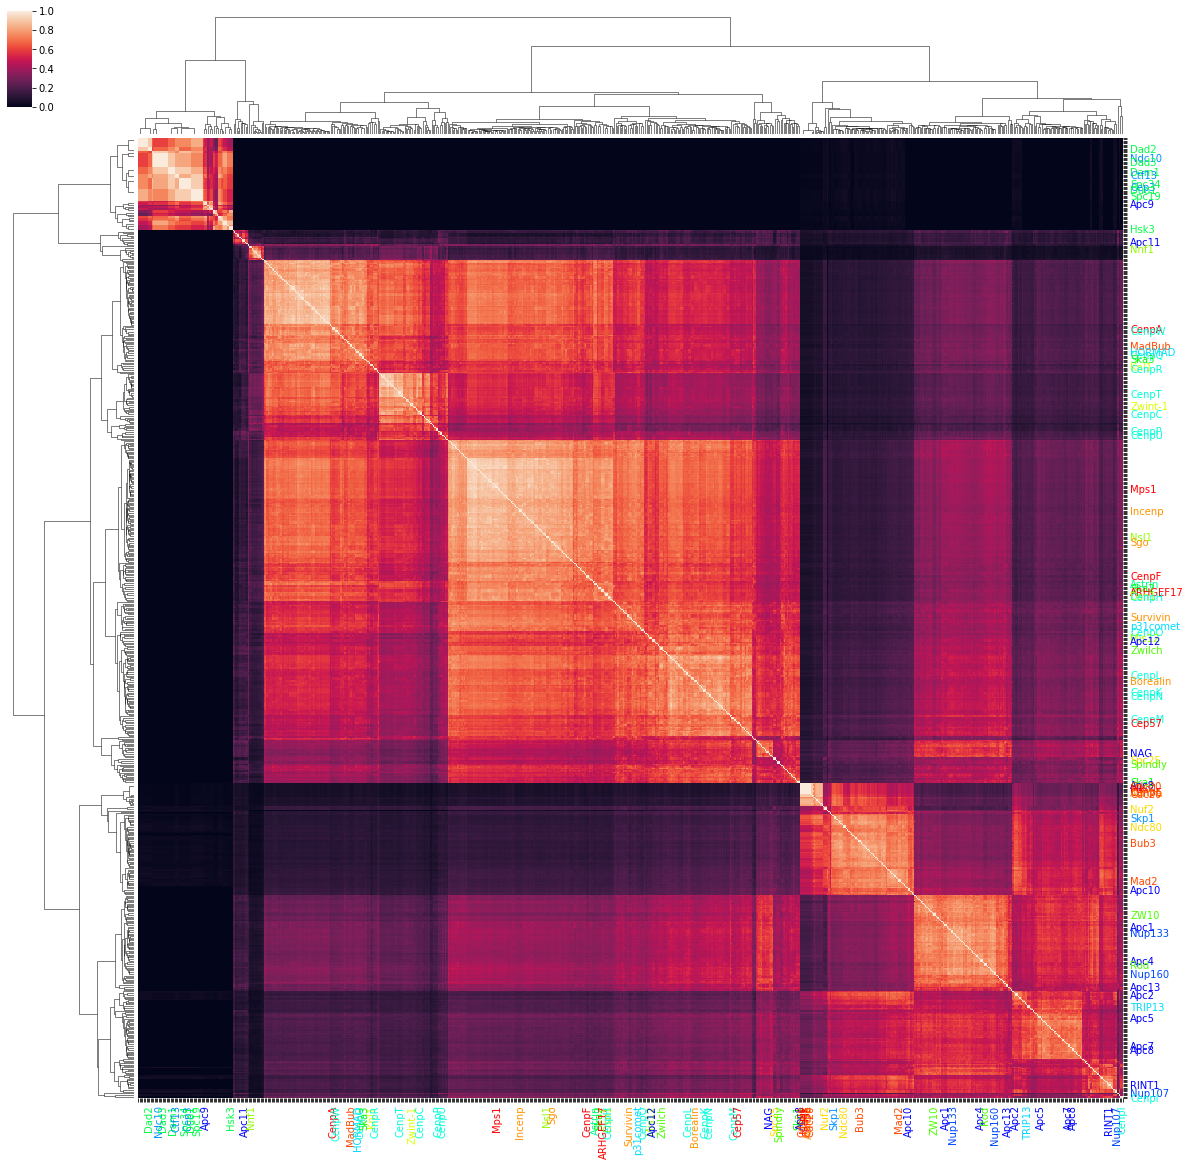

In [64]:
#lets perform and enrichment on each cluster to see if we were able to pull down some functional modules
#some of these results may be unknown kinetochore proteins under an open world assumption

jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )



/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


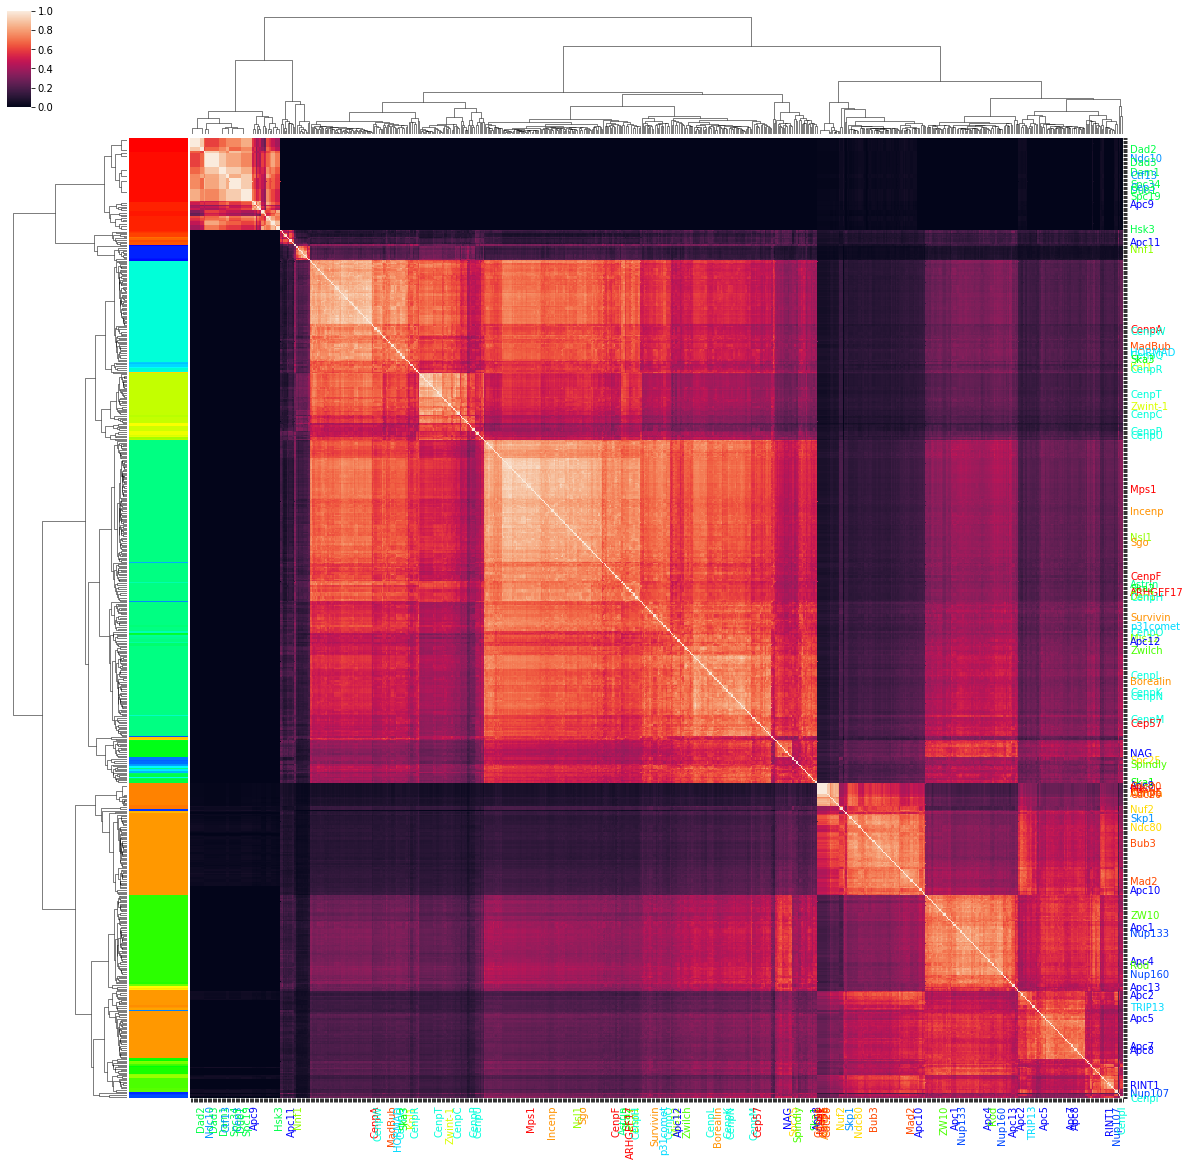

In [65]:
import scipy

z = scipy.cluster.hierarchy.linkage(jkern, method='single', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=0.95, criterion='distance')
colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
colordict2 = dict( zip( list(set(clusters)) , list(colors)))
rowcolors = [ colordict2[c] for c in clusters]

g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) , row_colors=rowcolors )
colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
red = colour.Color('red')
blue = colour.Color('blue')
colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
colordict = { n:colors[colordict[n]] for n in colordict}
red = colour.Color('red')
blue = colour.Color('blue')
                                
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)

for tick_label in g.ax_heatmap.axes.get_xticklabels():
    l = tick_label.get_text()
    if l in colordict:
        c =colordict[l]
    else:
        c = '#000000'
    tick_label.set_color(c)
   
plt.show()



In [75]:
#we can enrich for functionality in each cluster
goares = {}

for c in np.unique(clusters):
    sub = profiles.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if sum(sub.name.str.len()) >0 : 
        print(sub)
        goares[c] = goa.run_GOEA_onresults( sub.index.map( hogid2fam ) , p.db_obj, study)
        

                                                          hashsig  name
218106          <datasketch.weighted_minhash.WeightedMinHash o...      
218439          <datasketch.weighted_minhash.WeightedMinHash o...      
218003          <datasketch.weighted_minhash.WeightedMinHash o...      
218273          <datasketch.weighted_minhash.WeightedMinHash o...      
218447          <datasketch.weighted_minhash.WeightedMinHash o...      
218876          <datasketch.weighted_minhash.WeightedMinHash o...      
218222          <datasketch.weighted_minhash.WeightedMinHash o...      
217749          <datasketch.weighted_minhash.WeightedMinHash o...      
218814          <datasketch.weighted_minhash.WeightedMinHash o...      
217813          <datasketch.weighted_minhash.WeightedMinHash o...      
b'HOG:0218447'  <datasketch.weighted_minhash.WeightedMinHash o...  Dad2
compiling hogs
0
10
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 107 IDs ...
100%     75 of  

In [82]:
for c in goares:
    sub = profiles.iloc[ np.where( clusters == c ) ]
    namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ])
    goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.05]
    study.wr_txt(namestr + "_kinecluster_enrich.txt", goea_results_sig)
    print(len(goea_results_sig))

     45 GOEA results for    75 study items. WROTE: Dad2__kinecluster_enrich.txt
45
    142 GOEA results for   300 study items. WROTE: Dam1_Duo1_Cep3_Dad3_Spc19_Ndc10_Spc34_Ctf13__kinecluster_enrich.txt
142
     79 GOEA results for    81 study items. WROTE: Apc9_Hsk3__kinecluster_enrich.txt
79
      6 GOEA results for    10 study items. WROTE: Apc11__kinecluster_enrich.txt
6
     85 GOEA results for   408 study items. WROTE: Nuf2__kinecluster_enrich.txt
85
   8683 GOEA results for 151950 study items. WROTE: Aurora_Cdc20_CenpE_Plk_Mad1_Cdc20_Apc8__kinecluster_enrich.txt
8683
     48 GOEA results for   206 study items. WROTE: TRIP13__kinecluster_enrich.txt
48
   3555 GOEA results for 35254 study items. WROTE: Ndc80_Mad2_Skp1_Apc7_Apc8_Apc10_Apc5_Apc2_Bub3__kinecluster_enrich.txt
3555
     18 GOEA results for    68 study items. WROTE: CenpU__kinecluster_enrich.txt
18
     17 GOEA results for   104 study items. WROTE: CenpP__kinecluster_enrich.txt
17
    277 GOEA results for  1304 study ite

In [ ]:
#now lets look at a completely unknown network: sexual reproduction
#lets star with 3 queries of known proteins

In [34]:
#search Hap2 SPo11 Gex1
#mapping Hap2's uniprot ID to its OMA entry and querying with the OMA HOG
hap2= p.db_obj.id_resolver.resolve('f4jp36')
entry = p.db_obj.entry_by_entry_nr(hap2)
print(entry)
hap2hogs = p.hog_query(hog_id= str(entry[4]) ,  k=100)
print(hap2hogs)

#same for gex1
gex1= p.db_obj.id_resolver.resolve('A0A1P8B9F7')
entry = p.db_obj.entry_by_entry_nr(gex1)
print(entry)
gexhogs = p.hog_query(hog_id= str(entry[4]) , k=100)
print(gexhogs)

#and spo11
spo11= p.db_obj.id_resolver.resolve('Q9M4A2')
entry = p.db_obj.entry_by_entry_nr(spo11)
print(entry)
spohogs = p.hog_query(hog_id= str(entry[4]) , k=100 )
print(spohogs)


(12398377, 4765549562, 706, 668654, b'HOG:0406399.2a.10b', b'4', 7063291, 7066784, 1, 0, b'HAP2_ARATH', 14309047062, 2119, b'64dcfddd880e7d4265a77286668f7be9', 630450286, 25, b'', -1, -1)
['414742', '421654', '409614', '409944', '404191', '421656', '420663', '419278', '407230', '419540', '419543', '408865', '423743', '403926', '423361', '419267', '420732', '421430', '417839', '405025', '419171', '606049', '412247', '422070', '409717', '419634', '421465', '609329', '414966', '417307', '413423', '419342', '419765', '420313', '407788', '415736', '421847', '418544', '417725', '405751', '406399', '412688', '420106', '422435', '408259', '423471', '416115', '417727', '414941', '606027', '410798', '418908', '420152', '417945', '412966', '412112', '413329', '404158', '421568', '414618', '413358', '421028', '405177', '404515', '407561', '423686', '422283', '416313', '605786', '419057', '421223', '409093', '409591', '415706', '409434', '407227', '417013', '421975', '408201', '406954', '413306', '

In [24]:
#reading in the sequence identifiers for all HOGs pulled down in a search from the HDF5 can take some time
goares = {}
searches = {'hap':hap2hogs, 'gex':gexhogs, 'spo':spohogs}
for res in searches:
    goares[res] = goa.run_GOEA_onresults( searches[res], p.db_obj, study)

compiling hogs
0
10
20
30
40
50
60
70
80
90
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 11637 IDs ...
100%  9,070 of  9,070 study items found in association
 78%  9,070 of 11,637 study items found in population(8270255)
Calculating 27,275 uncorrected p-values using fisher_scipy_stats
  27,275 GO terms are associated with 8,270,213 of 8,270,255 population items
     552 GO terms are associated with  9,070 of 11,637 study items
  METHOD fdr_bh:
   1,010 GO terms found significant (< 0.15=alpha) (285 enriched + 725 purified): statsmodels fdr_bh
   8,372 study items associated with significant GO IDs (enriched)
   3,228 study items associated with significant GO IDs (purified)
done
DONE!
compiling hogs
0
10
20
30
40
50
60
70
80
90
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 6904 IDs ...
100%  4,988 of  4,988 study items found in association
 72%  4,988 of  6,904 study items found in population(8270255)


In [25]:
for res in goares:
    goea_results_sig = [r for r in goares[res][0] if r.p_fdr_bh < 0.05]
    study.wr_txt(res + "enrich.txt", goea_results_sig)
    print(len(goea_results_sig))

    885 GOEA results for  8766 study items. WROTE: hapenrich.txt
885
    530 GOEA results for  4701 study items. WROTE: gexenrich.txt
530
   2414 GOEA results for 17400 study items. WROTE: spoenrich.txt
2414


In [131]:
#And now let's try the same thing with a bigger list of candidate genes
#load reproduction pathway hogs. These were downloaded from the SGD database as tsv files by selecting salient go terms. I added a few non yeast entries manually
hogdf = pd.DataFrame.from_csv('./repro_hogs.csv')
hogdf['HOG'] = hogdf['1'].map( grabHog )
hogdf = hogdf[ ~hogdf.HOG.isna() ]
hashes = p.pull_hashes( [h for h in hogdf.HOG if len(h)>0] )
hogdf['hashsig'] = hogdf.HOG.map(hashes)
hogdf = hogdf[ ~hogdf.hashsig.isnull() ]
hogdf = hogdf.drop_duplicates('3')
print(hogdf.head())

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


              0        1              2     3  \
0.0  S000001692  YKL209C  S. cerevisiae  STE6   
1.0  S000002248  YDL090C  S. cerevisiae  RAM1   
2.0  S000006326  YPR122W  S. cerevisiae  AXL1   
0.0  S000000951  YER149C  S. cerevisiae  PEA2   
1.0  S000003944  YLL021W  S. cerevisiae  SPA2   

                                       4  \
0.0                              STErile   
1.0  RAS protein and A-factor Maturation   
2.0                        AXiaL budding   
0.0                  PEAnut shmoo mutant   
1.0                 Spindle Pole Antigen   

                                          path      OMAID                HOG  \
0.0  ./yeastmating/results_signal_strength.tsv  6844990.0     b'HOG:0259166'   
1.0  ./yeastmating/results_signal_strength.tsv  6842368.0  b'HOG:0405589.7a'   
2.0  ./yeastmating/results_signal_strength.tsv  6847757.0     b'HOG:0219055'   
0.0       ./yeastmating/results_polarisome.tsv  6843538.0     b'HOG:0217913'   
1.0       ./yeastmating/results_polariso

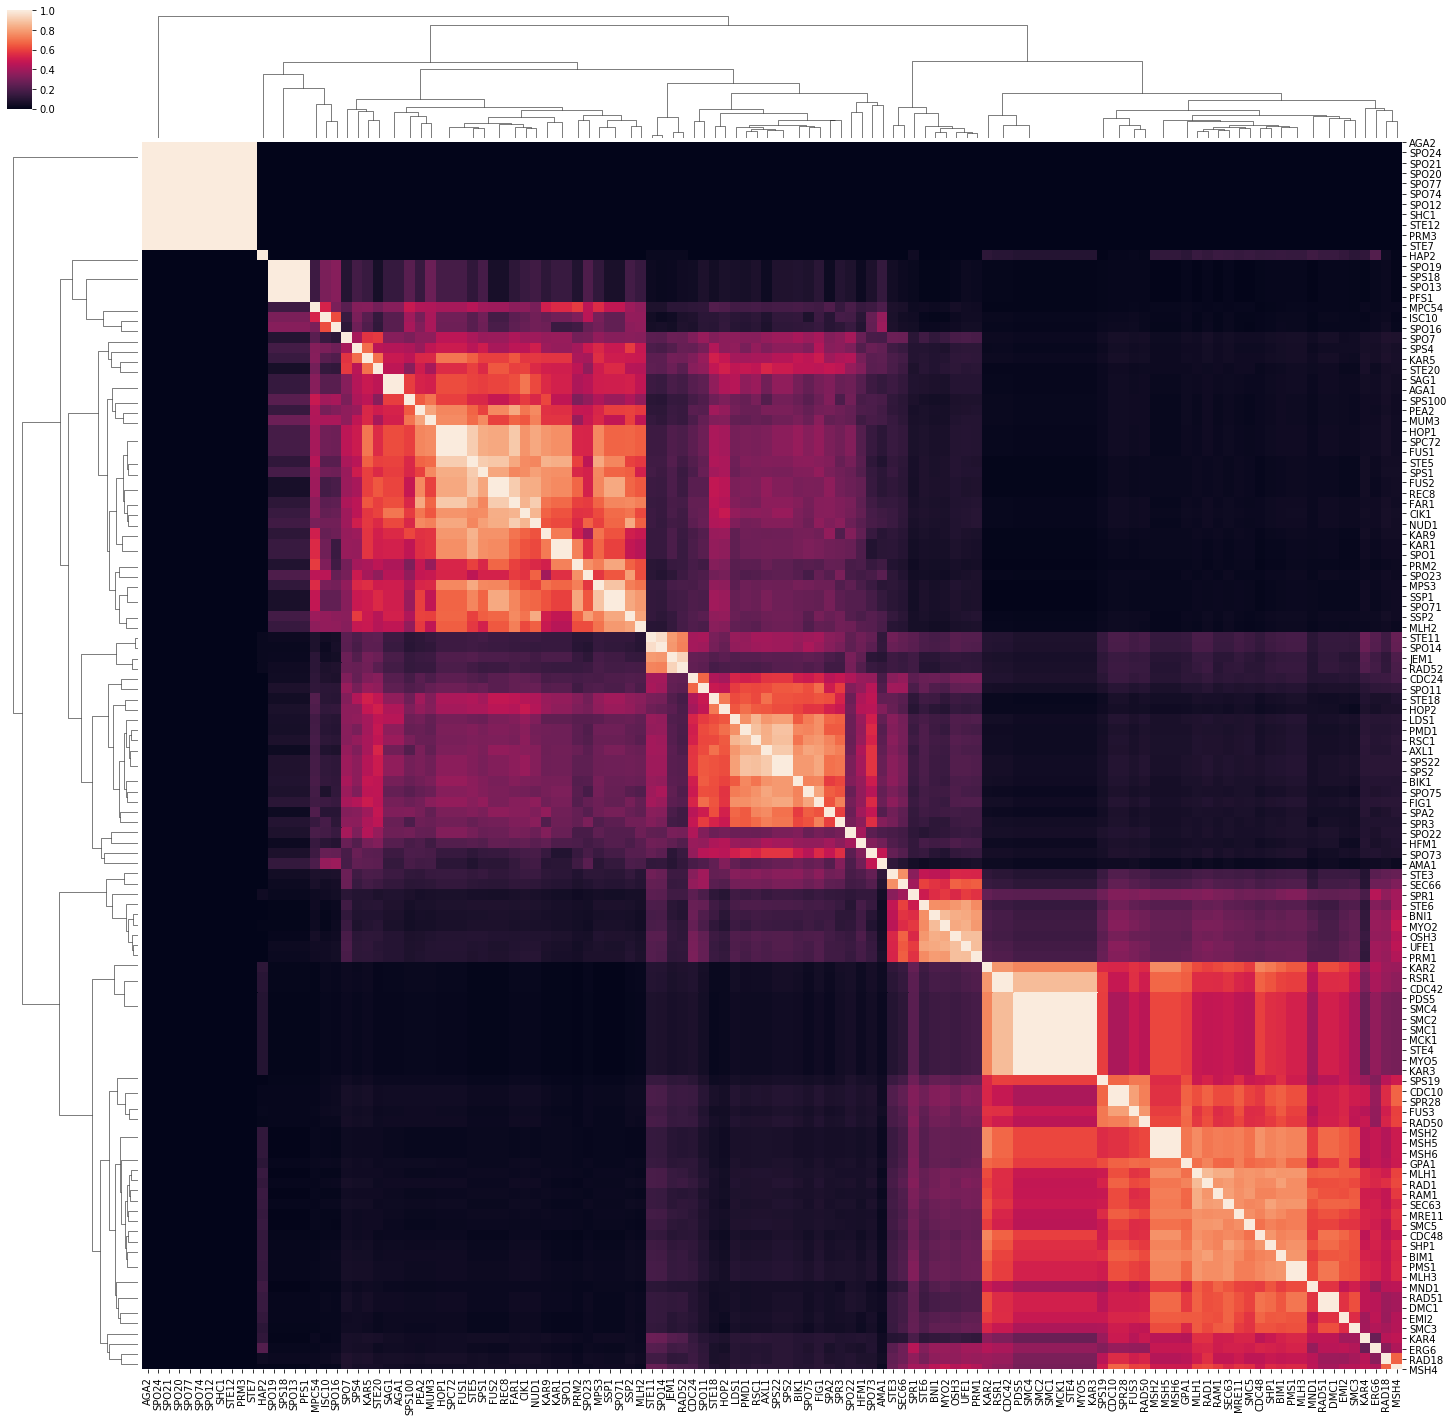

In [126]:
#lets take a look at the clustering of our queries to see if some are coevolving and we can already notice some organisation
jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(hogdf.hashsig) ] for i,h1 in enumerate(hogdf.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )
g = sns.clustermap( jkern , xticklabels= hogdf['3'] , yticklabels= hogdf['3'] , figsize = (25,25) )

In [135]:
#now lets fill in our network with some putative interactors
res = { h: p.hog_query( hog_id=str(h) ) for h in hogdf.HOG}
Hogs = [ h for results in res.values() for h in results ] + list(res.keys())

In [136]:
profiles = profiles = p.pull_hashes( set(Hogs) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles }
profiles = pd.DataFrame.from_dict( profiles , orient='index' )
print(profiles.head())

                                                  hashsig name
217825  <datasketch.weighted_minhash.WeightedMinHash o...     
217842  <datasketch.weighted_minhash.WeightedMinHash o...     
218130  <datasketch.weighted_minhash.WeightedMinHash o...     
218320  <datasketch.weighted_minhash.WeightedMinHash o...     
218367  <datasketch.weighted_minhash.WeightedMinHash o...     


In [ ]:
#lets calculate a new jaccard kernel for all of our search results and queries 
#again we can divide our results into clusters and try to see if each has a functional signature using GO enrichment
jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern = np.asarray(jkern)
jkern+=jkern.T
np.fill_diagonal(jkern , 1 )
z = scipy.cluster.hierarchy.linkage(jkern, method='single', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=0.95, criterion='distance')
colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
colordict2 = dict( zip( list(set(clusters)) , list(colors)))
rowcolors = [ colordict2[c] for c in clusters]
g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) , row_colors=rowcolors )
plt.show()